# Resultados de la 2a simulacion usando Dinamica Browniana, altura de la barrera

In [50]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math
import pandas as pd
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [7]:
potencial = np.loadtxt('pot300.dat')
potencial2 = np.loadtxt('pot300-0.5.dat')
potencial3 = np.loadtxt('pot300-1.0.dat')
potencial4 = np.loadtxt('pot300-1.5.dat')
potencial5 = np.loadtxt('pot300-2.0.dat')
potencial6 = np.loadtxt('pot300-2.5.dat')

e = np.loadtxt('e2.dat')

g = np.loadtxt('g2.dat', skiprows=2)
g2 = np.loadtxt('g2-0.5.dat', skiprows=2)
g3 = np.loadtxt('g2-1.0.dat', skiprows=2)
g4 = np.loadtxt('g2-1.5.dat', skiprows=2)
g5 = np.loadtxt('g2-2.0.dat', skiprows=2)
g6 = np.loadtxt('g2-2.5.dat', skiprows=2)
g7 = np.loadtxt('g-MC.dat', skiprows=2)

fself = np.loadtxt('Fself2.dat')
fself2 = np.loadtxt('Fself2-0.5.dat')
fself3 = np.loadtxt('Fself2-1.0.dat')
fself4 = np.loadtxt('Fself2-1.5.dat')
fself5 = np.loadtxt('Fself2-2.0.dat')
fself6 = np.loadtxt('Fself2-2.5.dat')

data1 = np.loadtxt('conf_fin2.dat').T
xf1 = np.asarray(data1[0])
yf1 = np.asarray(data1[1])
zf1 = np.asarray(data1[2])
data2 = np.loadtxt('conf_fin2-0.5.dat').T
xf2 = np.asarray(data2[0])
yf2 = np.asarray(data2[1])
zf2 = np.asarray(data2[2])
data3 = np.loadtxt('conf_fin2-1.0.dat').T
xf3 = np.asarray(data3[0])
yf3 = np.asarray(data3[1])
zf3 = np.asarray(data3[2])
data4 = np.loadtxt('conf_fin2-1.5.dat').T
xf4 = np.asarray(data4[0])
yf4 = np.asarray(data4[1])
zf4 = np.asarray(data4[2])
data5 = np.loadtxt('conf_fin2-2.0.dat').T
xf5 = np.asarray(data5[0])
yf5 = np.asarray(data5[1])
zf5 = np.asarray(data5[2])
data6 = np.loadtxt('conf_fin2-2.5.dat').T
xf6 = np.asarray(data6[0])
yf6 = np.asarray(data6[1])
zf6 = np.asarray(data6[2])

In [3]:
bl = 7
x1 = xf1 - bl * np.int_(np.round(xf1 / bl))
y1 = yf1 - bl * np.int_(np.round(yf1 / bl))
z1 = zf1 - bl * np.int_(np.round(zf1 / bl))
x2 = xf2 - bl * np.int_(np.round(xf2 / bl))
y2 = yf2 - bl * np.int_(np.round(yf2 / bl))
z2 = zf2 - bl * np.int_(np.round(zf2 / bl))
x3 = xf3 - bl * np.int_(np.round(xf3 / bl))
y3 = yf3 - bl * np.int_(np.round(yf3 / bl))
z3 = zf3 - bl * np.int_(np.round(zf3 / bl))
x4 = xf4 - bl * np.int_(np.round(xf4 / bl))
y4 = yf4 - bl * np.int_(np.round(yf4 / bl))
z4 = zf4 - bl * np.int_(np.round(zf4 / bl))
x5 = xf5 - bl * np.int_(np.round(xf5 / bl))
y5 = yf5 - bl * np.int_(np.round(yf5 / bl))
z5 = zf5 - bl * np.int_(np.round(zf5 / bl))
x6 = xf6 - bl * np.int_(np.round(xf6 / bl))
y6 = yf6 - bl * np.int_(np.round(yf6 / bl))
z6 = zf6 - bl * np.int_(np.round(zf6 / bl))

In [4]:
# Medicion para saber si la distancia entre particulas es menor a rc 
diametro = 0.000001
phi = 0.1
dd = math.pow(3.14159265358 * diametro * diametro * diametro / (6 * phi),1 / 3)
rc=1.25 * diametro / dd

# Definimos una funcion para calcular las distancias menores al radio rc 
def distancia(x1,y1,z1):
    npa = []
    i=0
    while i <= (len(x1) - 1):
        vecinos = 0
        j = 0
        while j <= len(x1) - 1:
            if(j!=i):
                if(pow(((x1[i] - x1[j]) ** 2 + (y1[i] - y1[j]) ** 2 + (z1[i] - z1[j]) ** 2), 0.5) <= rc):
                    vecinos += 1
            j += 1
        npa.append(vecinos)
        i += 1
    return npa


In [6]:
#Calculamos las distancias entre las particulas
vec1 = distancia(x1, y1, z1)
vec2 = distancia(x2, y2, z2)
vec3 = distancia(x3, y3, z3)
vec4 = distancia(x4, y4, z4)
vec5 = distancia(x5, y5, z5)
vec6 = distancia(x6, y6, z6)

## Grafica del potencial (nk=300)

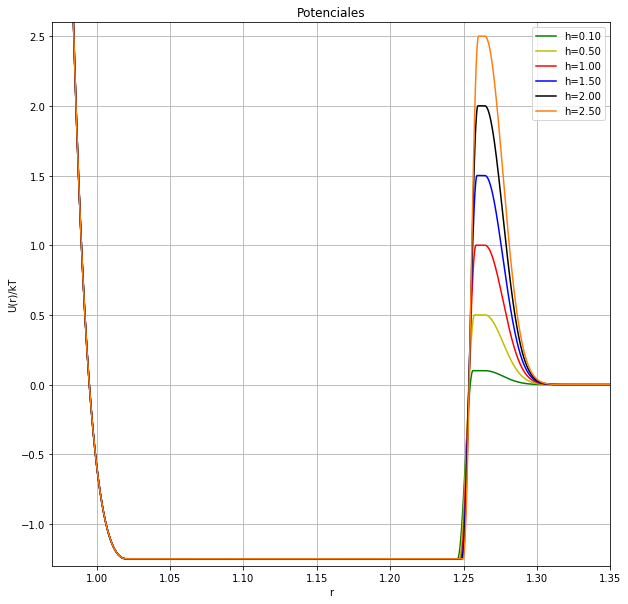

In [32]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(potencial[0:,0], potencial[0:,1], color='g', label="h=0.10")
plt.plot(potencial2[0:,0], potencial2[0:,1], color='y', label="h=0.50")
plt.plot(potencial3[0:,0], potencial3[0:,1], color='r', label="h=1.00")
plt.plot(potencial4[0:,0], potencial4[0:,1], color='b', label="h=1.50")
plt.plot(potencial5[0:,0], potencial5[0:,1], color='k', label="h=2.00")
plt.plot(potencial6[0:,0], potencial6[0:,1], color='tab:orange', label="h=2.50")

plt.ylim(-1.3,2.6)
plt.xlim(0.97,1.35)
plt.grid(b=None, which='major', axis='both')

plt.ylabel("U(r)/kT") 
plt.xlabel("r")
plt.title("Potenciales")
plt.legend()

## Grafica de factor de distribucion radial g(r) 

Text(0.5,1,'Factor de distribucion radial g(r)')

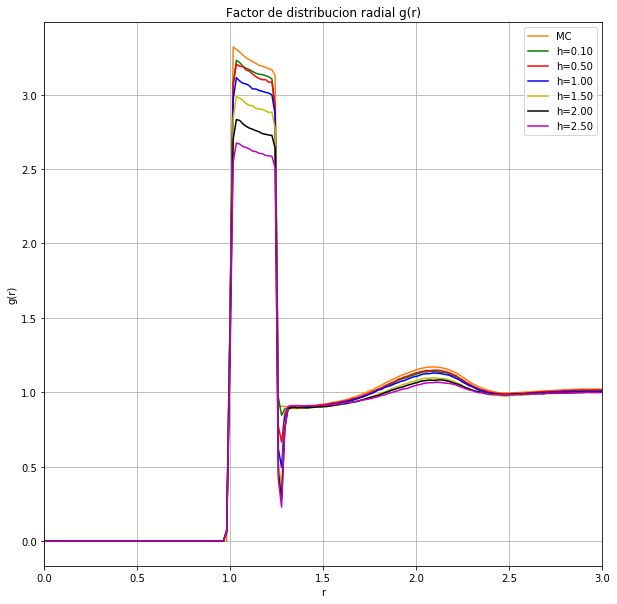

In [43]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.grid(b=None, which='major', axis='both')
plt.plot(g7[0:,0], g7[0:,1], color='tab:orange', label='MC')
plt.plot(g[0:,0], g[0:,1], color='g', label='h=0.10')
plt.plot(g2[0:,0], g2[0:,1], color='r', label='h=0.50')
plt.plot(g3[0:,0], g3[0:,1], color='b', label='h=1.00')
plt.plot(g4[0:,0], g4[0:,1], color='y', label='h=1.50')
plt.plot(g5[0:,0], g5[0:,1], color='k', label='h=2.00')
plt.plot(g6[0:,0], g6[0:,1], color='m', label='h=2.50')

plt.ylabel("g(r)") 
plt.xlabel("r")
plt.legend()
plt.xlim(0,3)
plt.title("Factor de distribucion radial g(r)")

## Grafica de energia por particula (h=.10)

Text(0.5,1,'Energia por particula (h=0.10)')

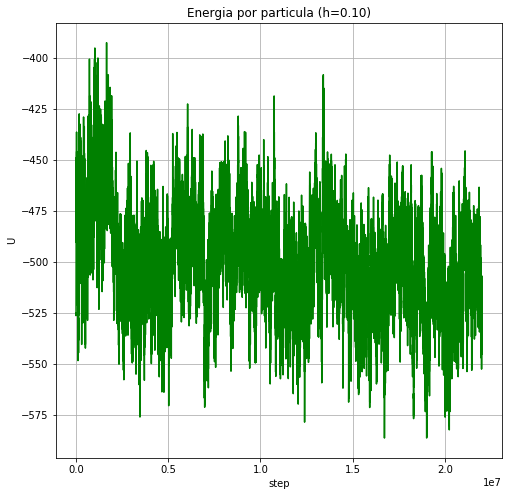

In [13]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(e[0:,0], e[0:,1], color='g')
plt.grid(b=None, which='major', axis='both')
plt.ylabel("U") 
plt.xlabel("step")
plt.title("Energia por particula (h=0.10)")

## Configuraciones finales

Text(0.5,0.92,'Configuracion final (h=0.10)')

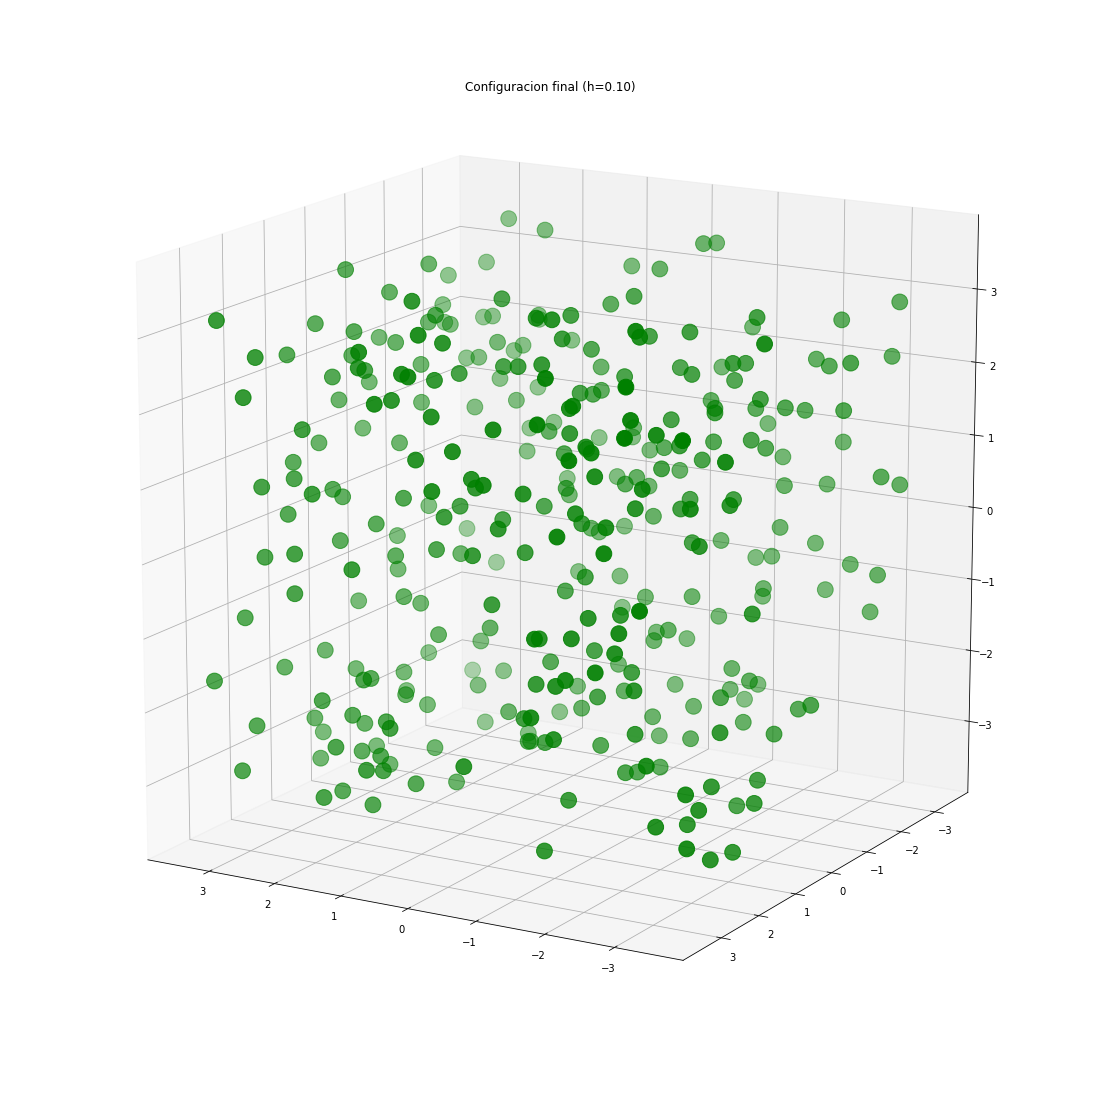

In [106]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
ax = Axes3D(fig)          
ax.scatter(x1, y1, z1, color='g', s=250)
ax.view_init(15, 120)
plt.title("Configuracion final (h=0.10)")

Text(0.5,0.92,'Configuracion final (h=0.5)')

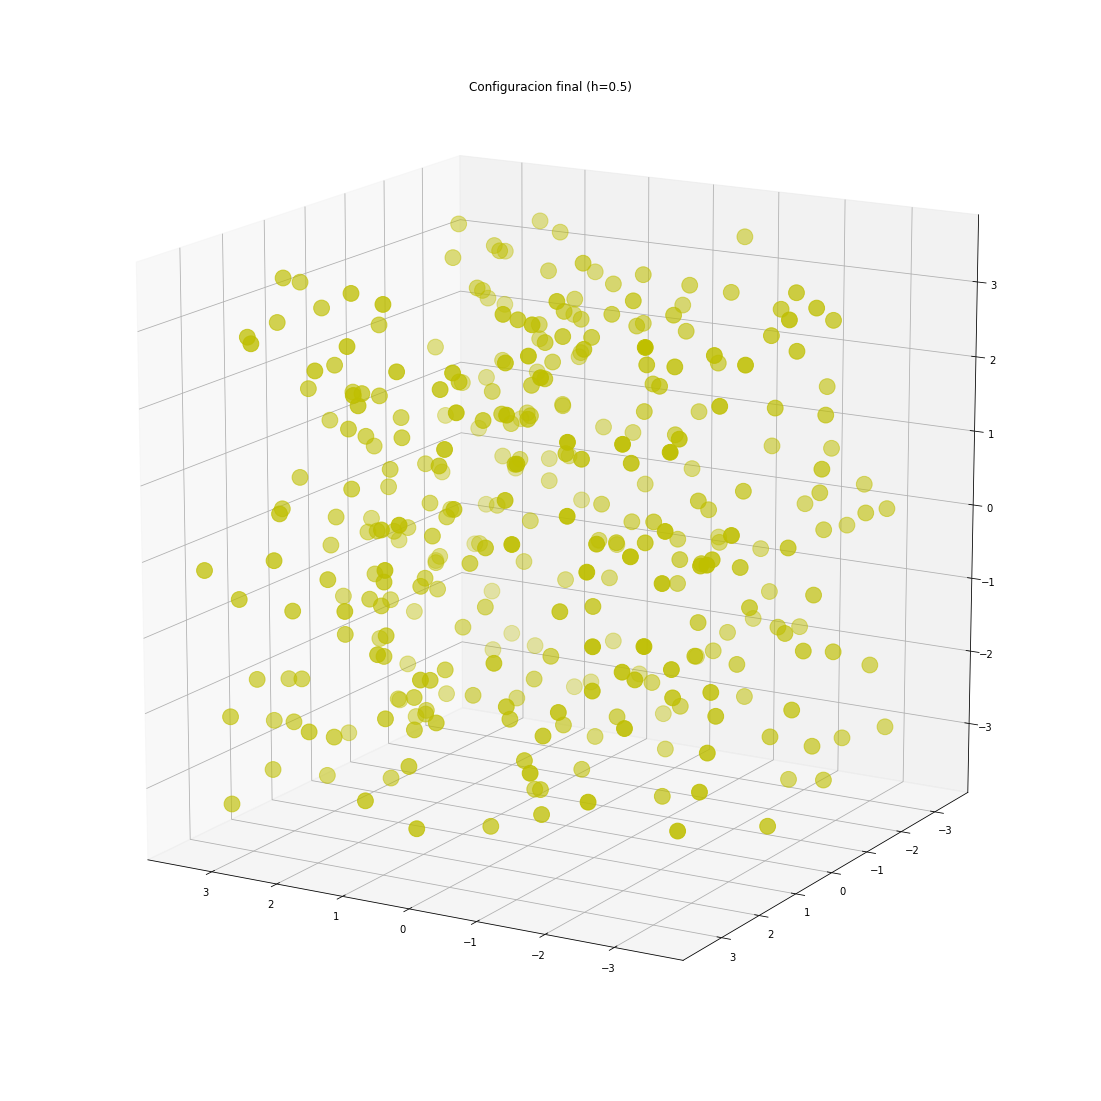

In [16]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
ax = Axes3D(fig)          
ax.scatter(x2, y2, z2, color='y', s=250)
ax.view_init(15, 120)
plt.title("Configuracion final (h=0.50)")

Text(0.5,0.92,'Configuracion final (h=1.0)')

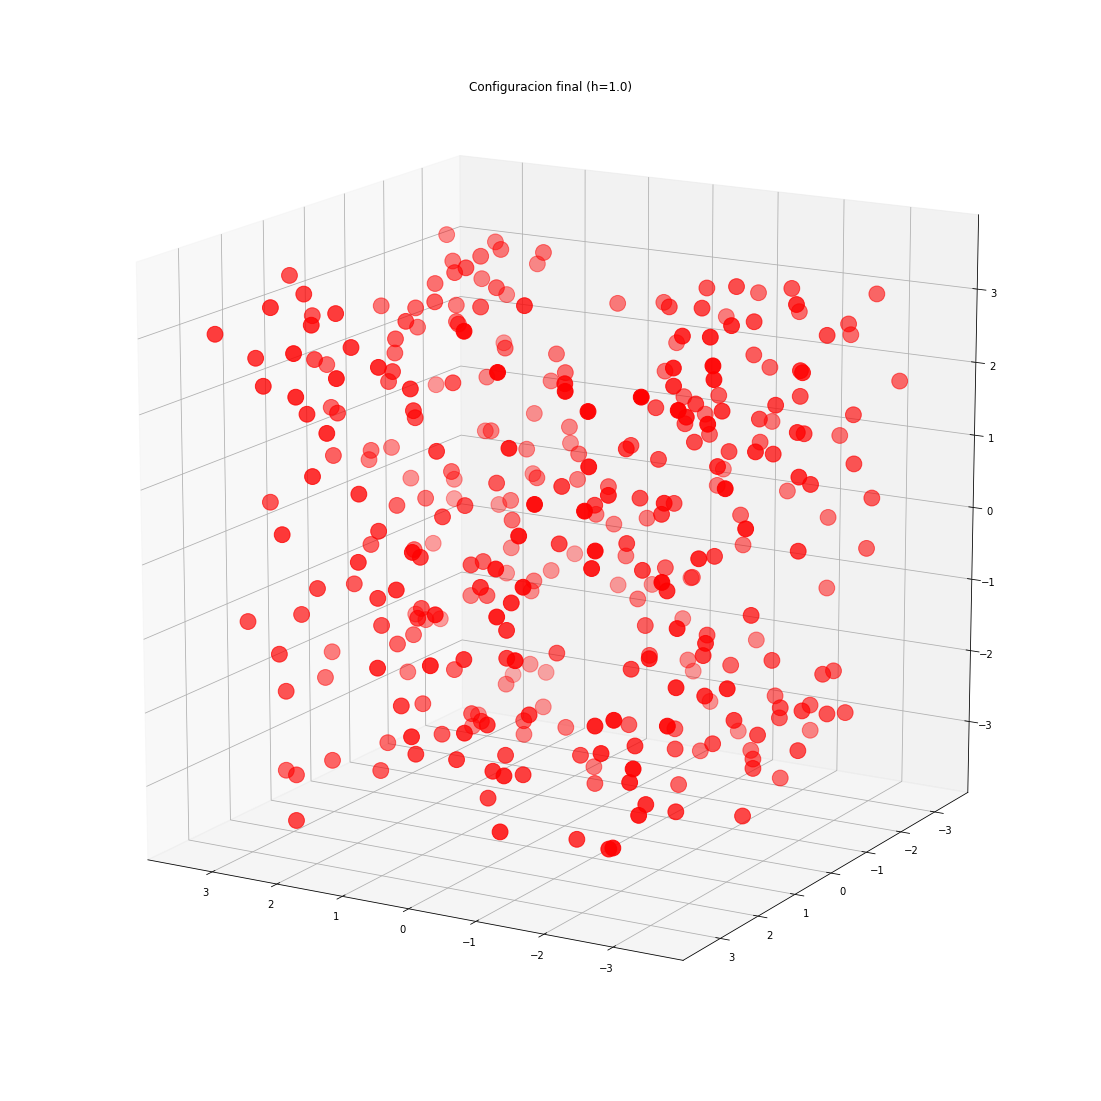

In [27]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
ax = Axes3D(fig)          
ax.scatter(x3, y3, z3, color='r', s=250)
ax.view_init(15, 120)
plt.title("Configuracion final (h=1.00)")

Text(0.5,0.92,'Configuracion final (h=1.5)')

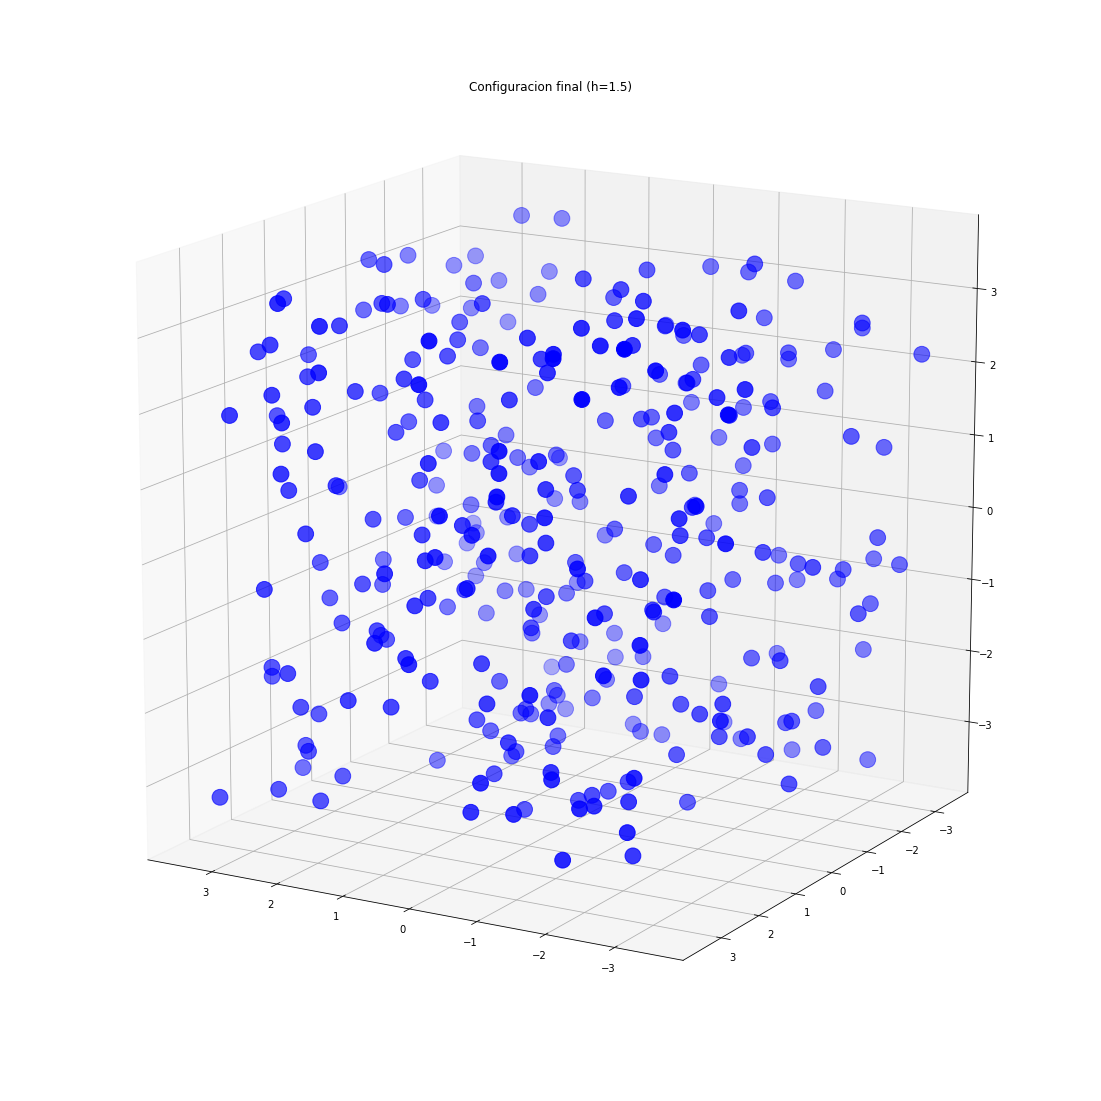

In [28]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
ax = Axes3D(fig)          
ax.scatter(x4, y4, z4, color='b', s=250)
ax.view_init(15, 120)
plt.title("Configuracion final (h=1.50)")

Text(0.5,0.92,'Configuracion final (h=2.0)')

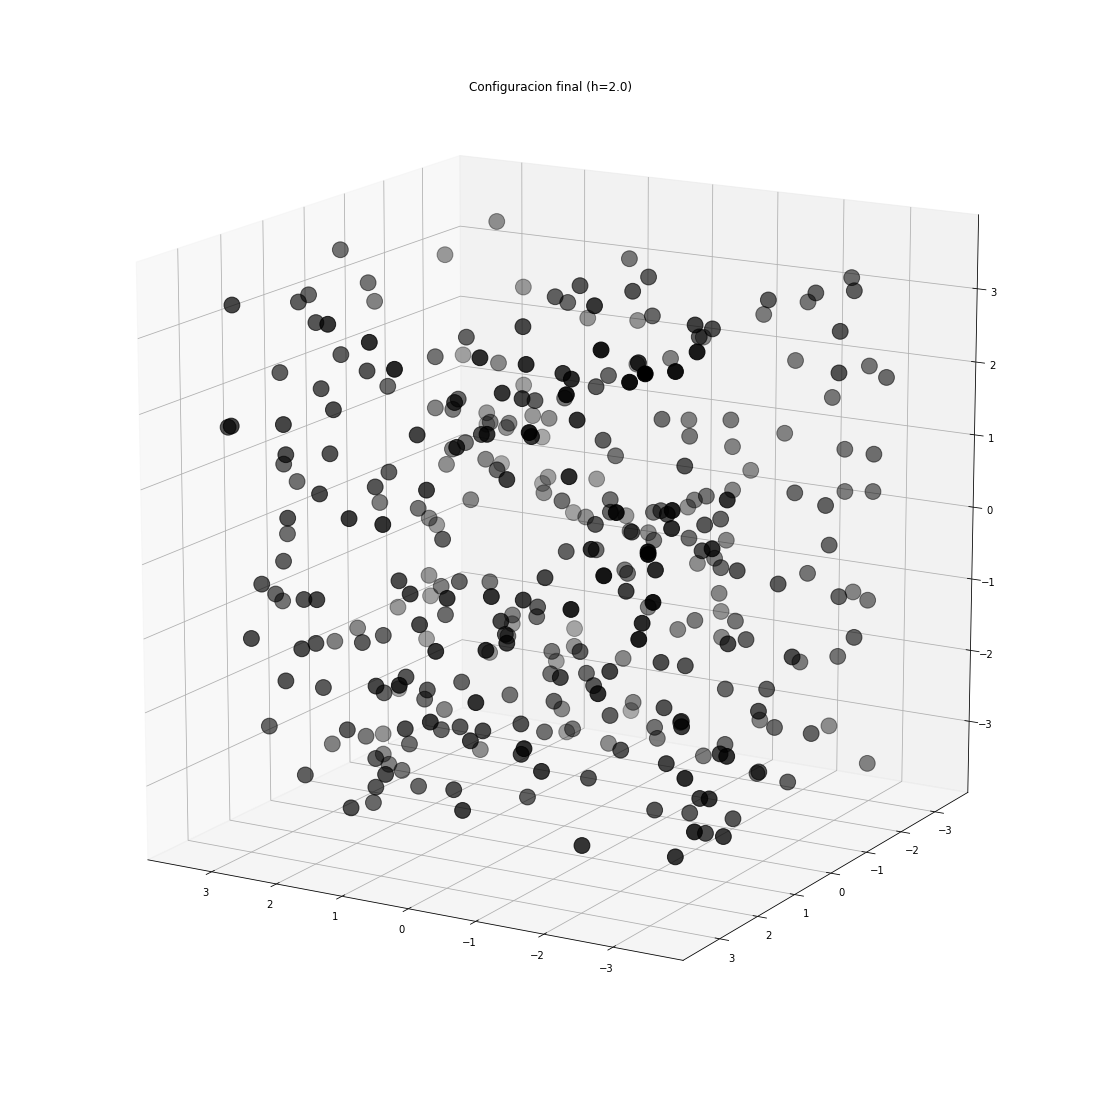

In [30]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
ax = Axes3D(fig)          
ax.scatter(x5, y5, z5, color='k', s=250)
ax.view_init(15, 120)
plt.title("Configuracion final (h=2.00)")

Text(0.5,0.92,'Configuracion final (h=2.5)')

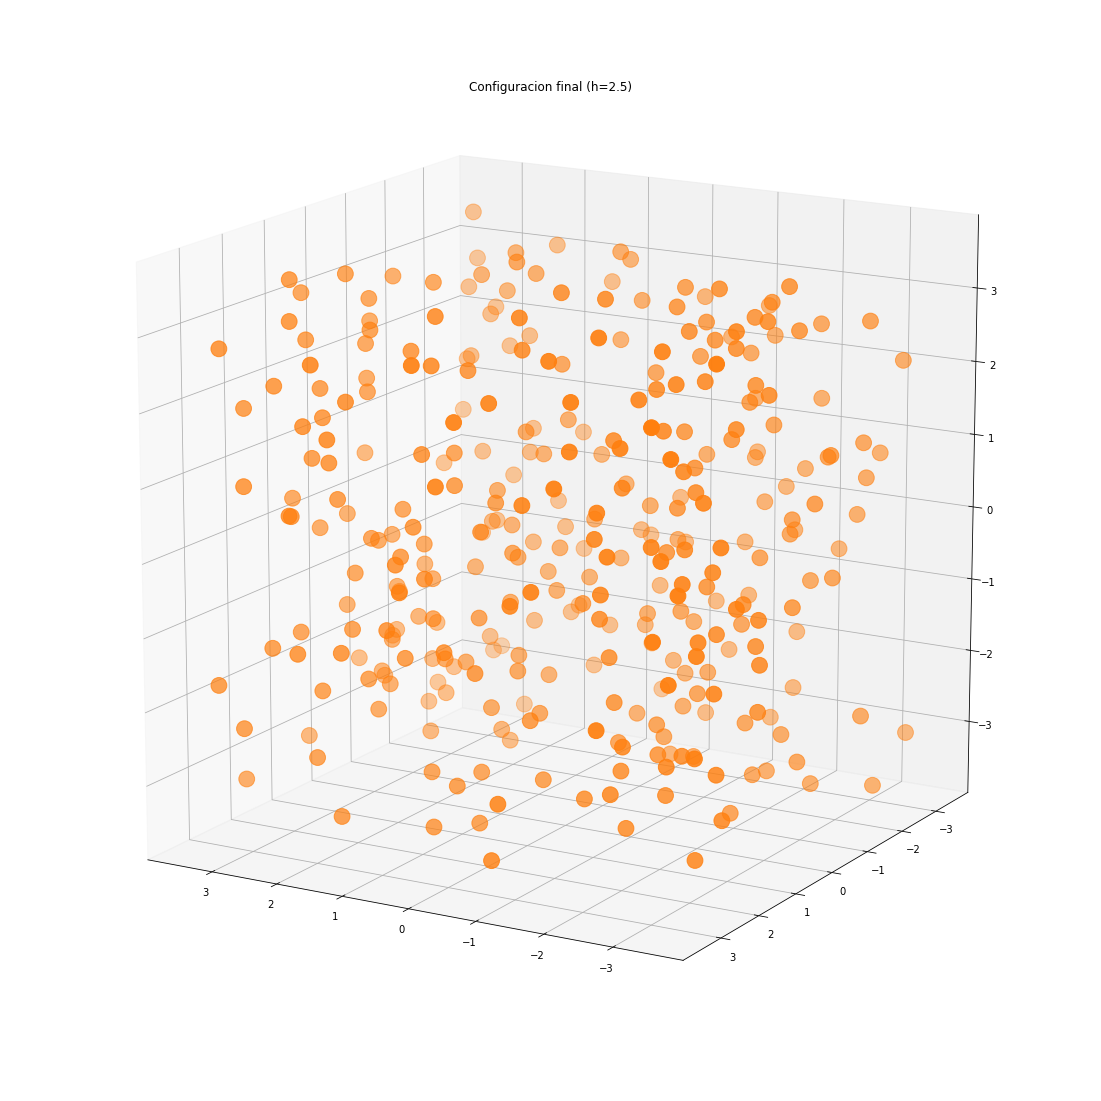

In [35]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
ax = Axes3D(fig)          
ax.scatter(x6, y6, z6, color='tab:orange', s=250)
ax.view_init(15, 120)
plt.title("Configuracion final (h=2.50)")

# Graficas de numero de vecinos por cada particula

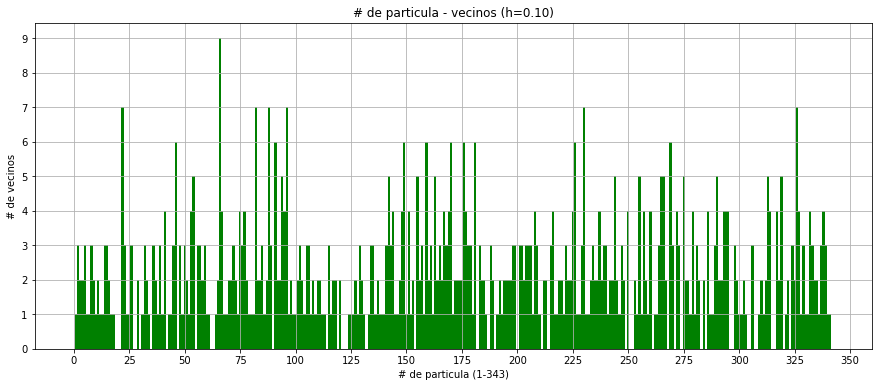

In [94]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=0.10)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec1, color = 'g',width=1)
plt.grid(True)
plt.savefig("vpp_0.1.jpg", bbox_inches='tight')

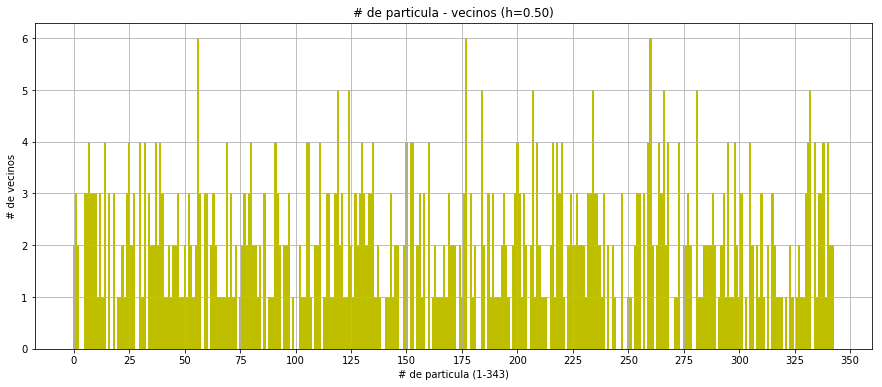

In [95]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=0.50)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec2, color = 'y',width=1)
plt.grid(True)
plt.savefig("vpp_0.5.jpg", bbox_inches='tight')

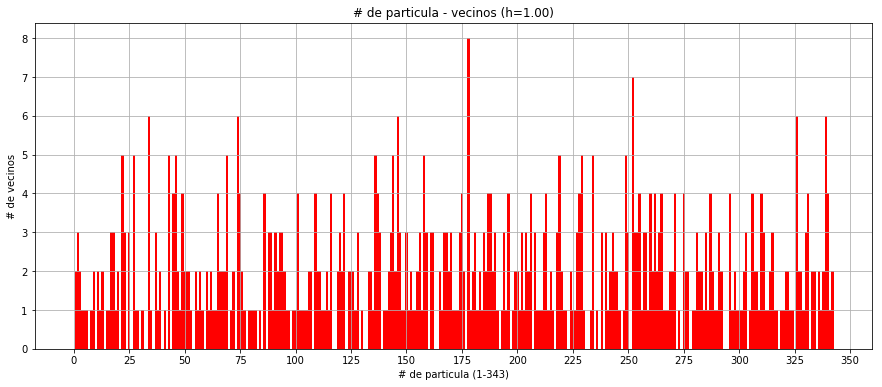

In [96]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=1.00)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec3, color = 'r',width=1)
plt.grid(True)
plt.savefig("vpp_1.0.jpg", bbox_inches='tight')

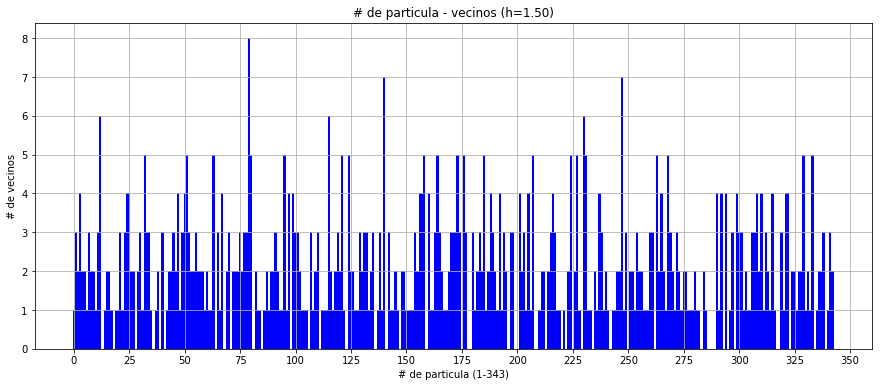

In [97]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=1.50)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec4, color = 'b',width=1)
plt.grid(True)
plt.savefig("vpp_1.5.jpg", bbox_inches='tight')

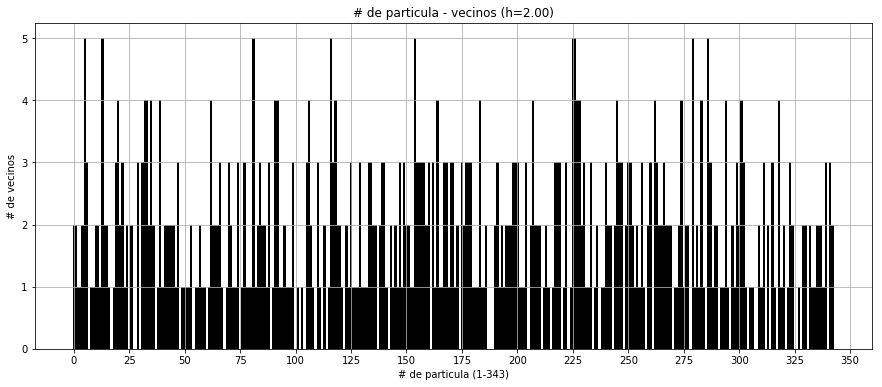

In [98]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=2.00)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec5, color = 'k',width=1)
plt.grid(True)
plt.savefig("vpp_2.0.jpg", bbox_inches='tight')

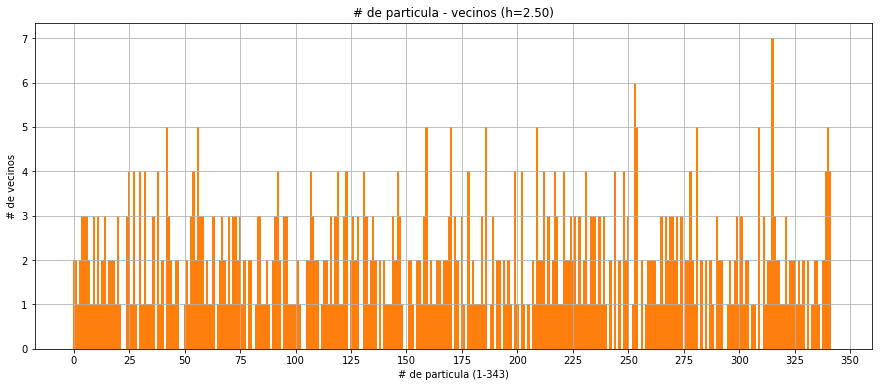

In [99]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=2.50)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec6, color = 'tab:orange',width=1)
plt.grid(True)
plt.savefig("vpp_2.5.jpg", bbox_inches='tight')

# Histograma

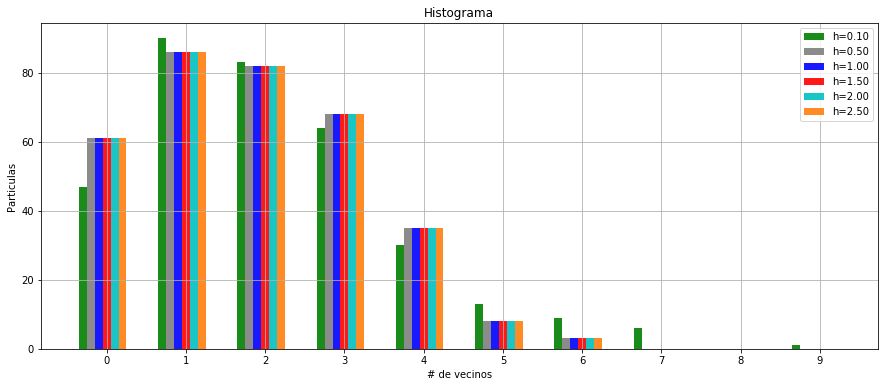

In [100]:
ax = figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

nbins = 11
aw=np.histogram(vec1, bins=np.arange(nbins))
aw2=np.histogram(vec2, bins=np.arange(nbins))
aw3=np.histogram(vec3, bins=np.arange(nbins))
aw4=np.histogram(vec4, bins=np.arange(nbins))
aw5=np.histogram(vec5, bins=np.arange(nbins))
aw6=np.histogram(vec6, bins=np.arange(nbins))

b = np.asarray(aw)
b2 = np.asarray(aw2)
b3 = np.asarray(aw2)
b4 = np.asarray(aw2)
b5 = np.asarray(aw2)
b6 = np.asarray(aw2)

y = [b[0][0], b[0][1], b[0][2], b[0][3], b[0][4], b[0][5], b[0][6], b[0][7], b[0][8], b[0][9]]
y2 = [b2[0][0], b2[0][1], b2[0][2], b2[0][3], b2[0][4], b2[0][5], b2[0][6], b2[0][7], b2[0][8], b2[0][9]]
y3 = [b3[0][0], b3[0][1], b3[0][2], b3[0][3], b3[0][4], b3[0][5], b3[0][6], b3[0][7], b3[0][8], b3[0][9]]
y4 = [b4[0][0], b4[0][1], b4[0][2], b4[0][3], b4[0][4], b4[0][5], b4[0][6], b4[0][7], b4[0][8], b4[0][9]]
y5 = [b5[0][0], b5[0][1], b5[0][2], b5[0][3], b5[0][4], b5[0][5], b5[0][6], b5[0][7], b5[0][8], b5[0][9]]
y6 = [b6[0][0], b6[0][1], b6[0][2], b6[0][3], b6[0][4], b6[0][5], b6[0][6], b6[0][7], b6[0][8], b6[0][9]]
X = np.arange(10)

plt.bar(X-.3, y, color = 'g',width=0.1, alpha=0.9, label='h=0.10')
plt.bar(X-.2, y2, color = 'tab:gray',width=0.1, alpha=0.9, label='h=0.50')
plt.bar(X-.1, y3, color = 'b',width=0.1, alpha=0.9, label='h=1.00')
plt.bar(X, y4, color = 'r',width=0.1, alpha=0.9, label='h=1.50')
plt.bar(X+.1, y5, color = 'c',width=0.1, alpha=0.9, label='h=2.00')
plt.bar(X+.2, y6, color = 'tab:orange',width=0.1, alpha=0.9, label='h=2.50')
plt.title("Histograma")
plt.ylabel("Particulas") 
plt.xlabel("# de vecinos")
plt.grid(True)
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlabel("# de vecinos")
plt.legend()


# Graficas de Fself

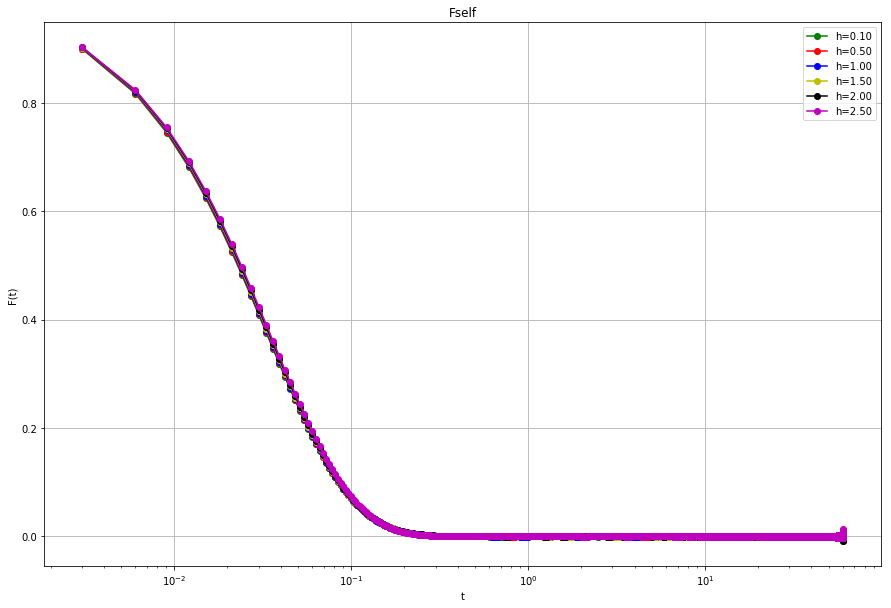

In [102]:
plt.rcParams["figure.figsize"] = (15,10)
plt.semilogx(fself[0:,0],fself[0:,1], marker='o',color='g', label='h=0.10', ms=6)
plt.semilogx(fself2[0:,0],fself2[0:,1], marker='o',color='r', label='h=0.50', ms=6)
plt.semilogx(fself3[0:,0],fself3[0:,1], marker='o',color='b', label='h=1.00', ms=6)
plt.semilogx(fself4[0:,0],fself4[0:,1], marker='o',color='y', label='h=1.50', ms=6)
plt.semilogx(fself5[0:,0],fself5[0:,1], marker='o',color='k', label='h=2.00', ms=6)
plt.semilogx(fself6[0:,0],fself6[0:,1], marker='o',color='m', label='h=2.50', ms=6)
plt.grid(b=None, which='major', axis='both')
plt.title("Fself")
plt.ylabel("F(t)") 
plt.xlabel("t")
plt.legend()

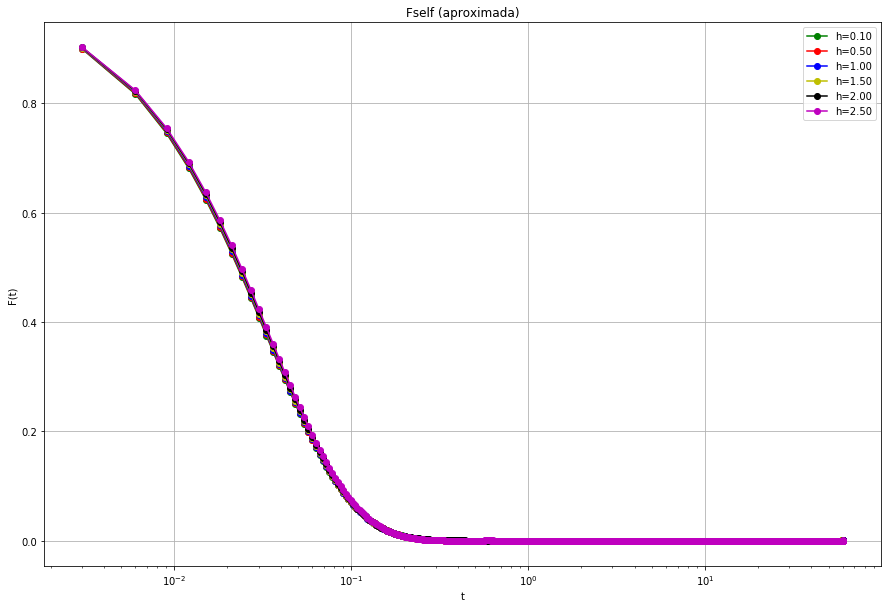

In [103]:
plt.rcParams["figure.figsize"] = (15,10)
plt.semilogx(fself[0:,0],fself[0:,2], marker='o', color='g', label='h=0.10', ms=6)
plt.semilogx(fself2[0:,0],fself2[0:,2], marker='o',color='r', label='h=0.50', ms=6)
plt.semilogx(fself3[0:,0],fself3[0:,2], marker='o',color='b', label='h=1.00', ms=6)
plt.semilogx(fself4[0:,0],fself4[0:,2], marker='o',color='y', label='h=1.50', ms=6)
plt.semilogx(fself5[0:,0],fself5[0:,2], marker='o',color='k', label='h=2.00', ms=6)
plt.semilogx(fself6[0:,0],fself6[0:,2], marker='o',color='m', label='h=2.50', ms=6)
plt.grid(b=None, which='major', axis='both')
plt.title("Fself (aproximada)")
plt.ylabel("F(t)") 
plt.xlabel("t")
plt.legend()